## Data Loading
First leg of the journey (10,000 points)

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
import itertools

import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Data Loading

In [2]:
telemetry = pd.read_csv('./telemetry_cleaned.csv')
X = telemetry[['Easting', 'Northing', 'WaterDepth']].head(10000)
X.head(5)

,Easting,Northing,WaterDepth
0,0.158187,0.410159,92.93
1,0.158187,0.410159,5.86
2,0.534407,0.535898,5.86
3,0.534311,0.535924,6.33
4,0.533734,0.536254,7.02


### Obtaining base epsilon

Code adapted from https://www.kaggle.com/code/tanmaymane18/nearestneighbors-to-find-optimal-eps-in-dbscan

In [9]:
nn = NearestNeighbors(n_neighbors=6).fit(X)
distances, indices = nn.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

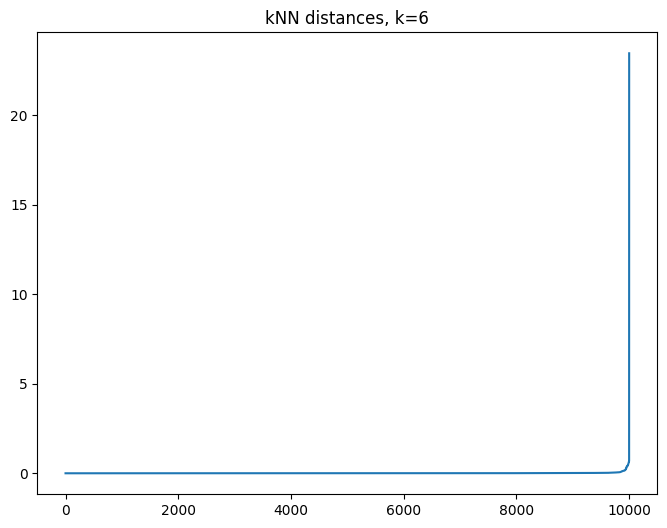

In [10]:
plt.figure(figsize=(8,6))
plt.title('kNN distances, k=6')
plt.plot(distances)

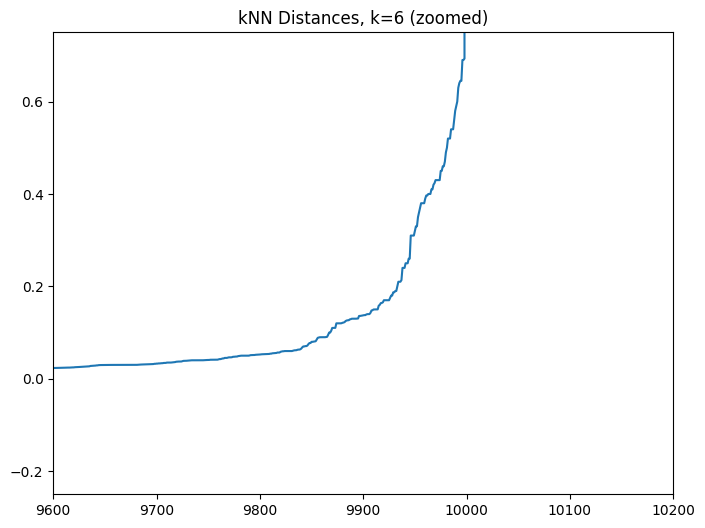

In [11]:
plt.figure(figsize=(8,6))
plt.title('kNN Distances, k=6 (zoomed)')
plt.xlim(9600,10200)
plt.ylim(-0.25,0.75)
plt.plot(distances)

### DBSCAN

In [12]:
db = DBSCAN(eps=0.15, min_samples=6).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

Estimated number of clusters: 11
Estimated number of noise points: 129


### Evaluating

In [13]:
silhouette = metrics.silhouette_score(X, labels)
davies_bouldin = metrics.davies_bouldin_score(X, labels)

print('Silhouette Score {:.5f}'.format(silhouette))
print('Davies-Bouldin {:.5f}'.format(davies_bouldin))

Silhouette Score 0.46711
Davies-Bouldin 1.20473
